You have been asked to support a team of researchers who have been collecting data about penguins in Antartica!

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
sex: penguin sex
Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

In [4]:
# Remove null from the data frame
penguins_clean = penguins_df.dropna()

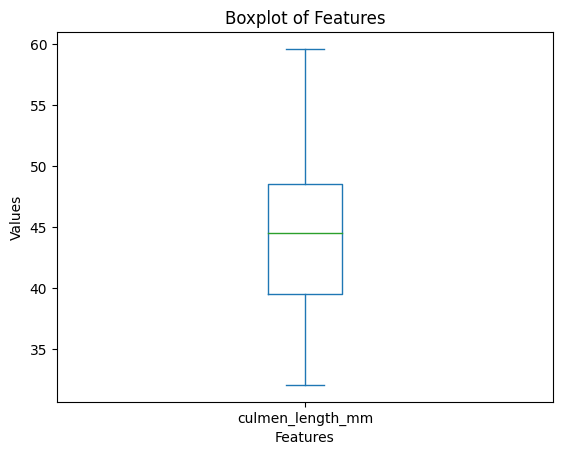

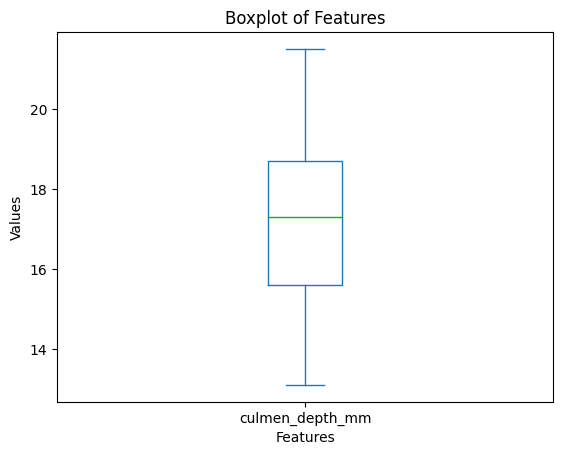

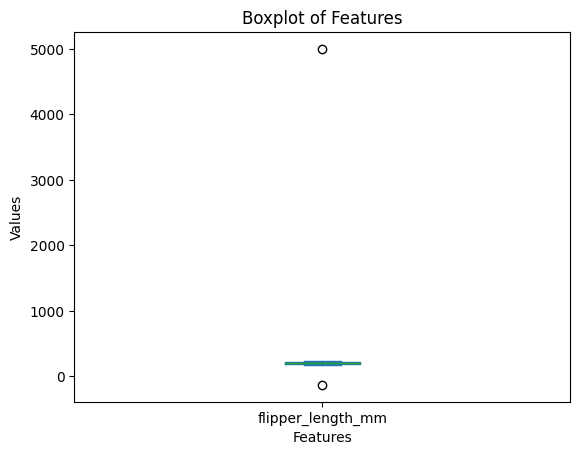

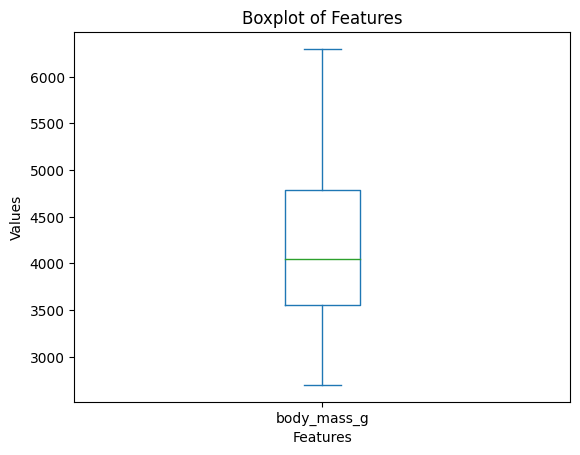

In [5]:
# Find outliers in the data
numeric_columns = penguins_clean.select_dtypes(include='number')
for column in numeric_columns:
    try:
        numeric_columns[column].plot.box()
        plt.xlabel('Features')
        plt.ylabel('Values')
        plt.title('Boxplot of Features')
        plt.show()
    except Exception as e:
        print(f"Error plotting column '{column}': {e}")

In [6]:
# Remove outliers from the data
penguins_clean = penguins_clean[(0 < penguins_clean["flipper_length_mm"]) & (penguins_clean["flipper_length_mm"] < 500)]

In [7]:
# Create dummy variables
dummy_sex = pd.get_dummies(penguins_clean['sex'], prefix='sex', drop_first=True)

In [8]:
# Concatenate the dummies with the original data frame and drop 'sex'
df = pd.concat([penguins_clean.drop('sex', axis=1), dummy_sex], axis=1)

In [9]:
# Standard scale the data
scaler = StandardScaler()
scaler.fit(df)
StandardScaler(copy=True, with_mean=True, with_std=True)
penguins_scaled = scaler.transform(df)
penguins_preprocessed = pd.DataFrame(penguins_scaled, columns=df.columns)

In [10]:
# Perform PCA on the preprocessed data
pca = PCA()
pca.fit(penguins_preprocessed)

PCA()

In [11]:
#cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
cumulative_variance_ratio = pca.explained_variance_ratio_

In [12]:
# Find the number of components with explained variance ratio above 10%
n_components = (cumulative_variance_ratio > 0.10).sum() + 1  # Add 1 to include the first component

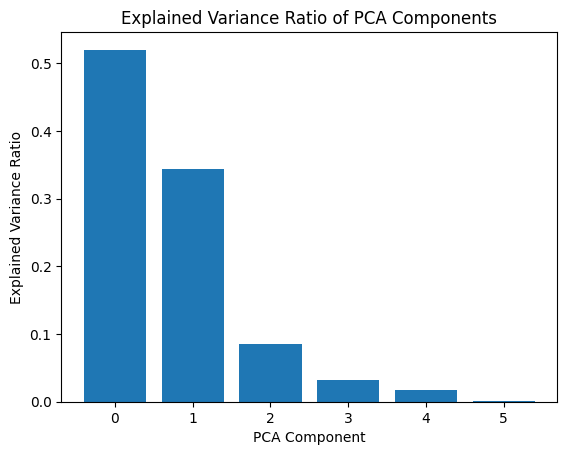

Desired number of components: 3


In [13]:
# Plot explained variance ratio
features = range(len(pca.explained_variance_ratio_))
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PCA Component')
plt.title('Explained Variance Ratio of PCA Components')
plt.show()

print("Desired number of components:", n_components)

In [14]:
# Execute PCA using the number of components
penguins_PCA = PCA(n_components=n_components)
penguins_PCA.fit(penguins_preprocessed)
penguins_PCA = penguins_PCA.transform(penguins_preprocessed)

In [15]:
# Employ k-means clustering
inertias = []
for k in range(1,10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(penguins_PCA)
    inertias.append(model.inertia_)

/Users/matt/Documents/Documents_Afsaneh/Courses/IT_Hogskolan/Projects/final_project/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/matt/Documents/Documents_Afsaneh/Courses/IT_Hogskolan/Projects/final_project/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/matt/Documents/Documents_Afsaneh/Courses/IT_Hogskolan/Projects/final_project/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/matt/Documents/Documents_Afsaneh/Courses/IT_Hogskolan/Projects/

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


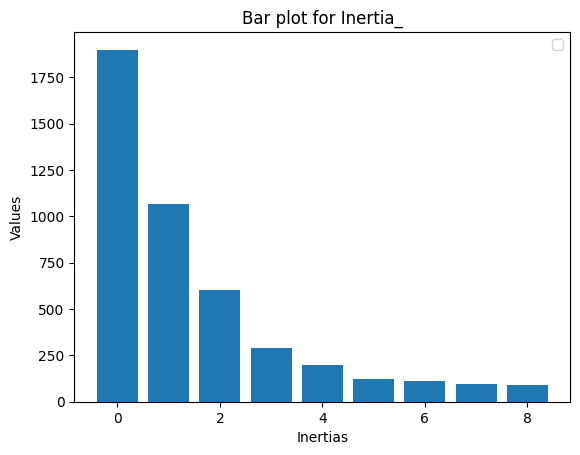

In [16]:
# Plot a bar plot for all inertia_ values
plt.bar(range(len(inertias)), inertias)
plt.xlabel('Inertias')
plt.ylabel('Values')
plt.title('Bar plot for Inertia_')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Bar Plot of Values')

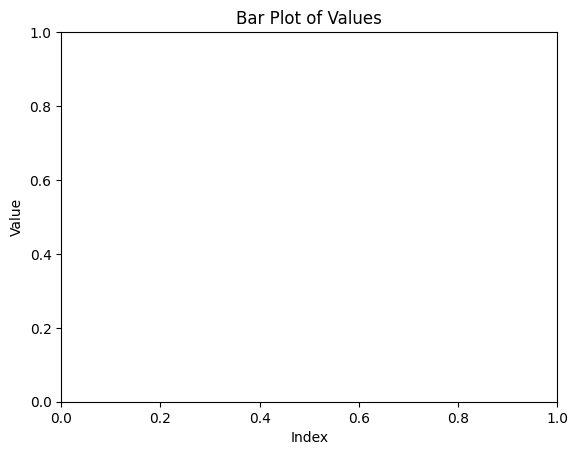

In [17]:
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Plot of Values')

In [18]:
# Set optimal number of clusters
n_cluster = 4

In [19]:
# Create a new k-means cluster model
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(penguins_PCA)
labels = kmeans.predict(penguins_PCA)

/Users/matt/Documents/Documents_Afsaneh/Courses/IT_Hogskolan/Projects/final_project/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


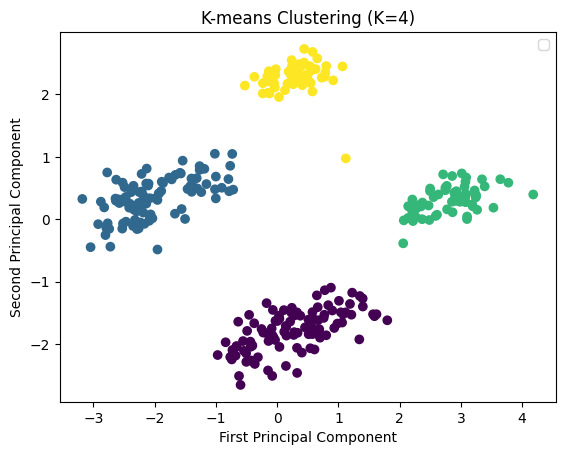

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,label
label,,,,
0,43.878302,19.111321,194.764151,0.0
1,40.217757,17.611215,189.046729,1.0
2,49.473770,15.718033,221.540984,2.0
3,45.545763,14.262712,212.779661,3.0


In [21]:
# Visualize the clusters using the first two PCs
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_cluster})')
plt.legend()
plt.show()

penguins_clean['label'] = labels
stat_penguins = penguins_clean.groupby('label')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']].mean()
stat_penguins